In [1]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import numpy as np
import array as arr

In [3]:
pd.read_csv('bbcsports_train.csv')

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
549,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
550,0,0,1,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,2


In [4]:
pd.read_csv('bbcsports_val.csv')

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,2
181,0,0,5,0,6,1,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
182,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
183,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [5]:
class_vals = pd.read_csv('bbcsports_train.csv')['class_label'].value_counts()
print(class_vals)

2    198
3    114
1     86
4     77
0     77
Name: class_label, dtype: int64


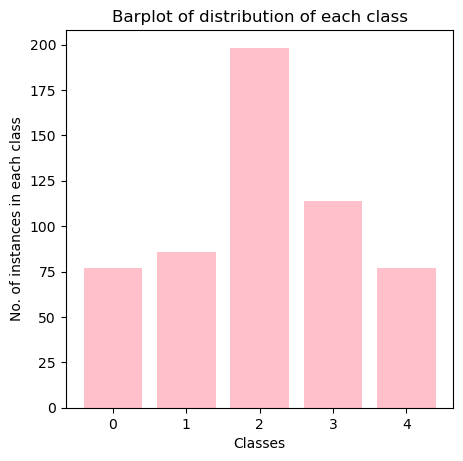

In [6]:
fig, axes = plt.subplots(figsize=(5,5), dpi=100)
plt.bar(class_vals.index, height=class_vals, color ='pink')
plt.xlabel("Classes")
plt.ylabel("No. of instances in each class")
plt.title('Barplot of distribution of each class');


In [7]:
validation = pd.read_csv('bbcsports_val.csv')['class_label'].value_counts()
print(validation)

2    67
1    38
3    33
0    24
4    23
Name: class_label, dtype: int64


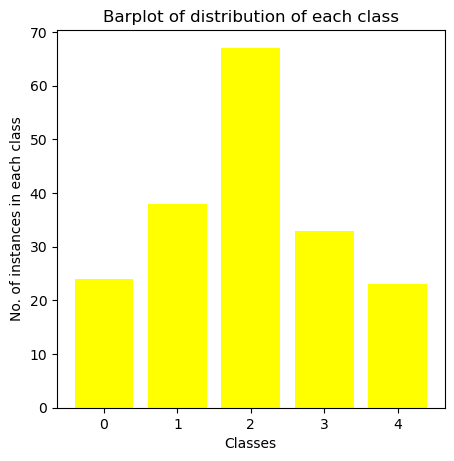

In [8]:
fig, axes = plt.subplots(figsize=(5,5), dpi=100)
plt.bar(validation.index, height=validation, color ='yellow')
plt.xlabel("Classes")
plt.ylabel("No. of instances in each class")
plt.title('Barplot of distribution of each class');


In [9]:
#We first need to estimate the probability of any particular document belonging to a class yk
#pi is the fraction of each class
pi = {}
train_y_arr = np.array([])
#Set a class index for each document as key
for i in range(0,5):
    pi[i] = 0    
    
train_set = pd.read_csv('bbcsports_train.csv') 

#Get total number of documents
train_x = train_set.shape[0]

#Count the occurence of each class
for i in range(len(train_set)):
    train_y = train_set['class_label'].iloc[i]
    pi[train_y] += 1
    train_y_arr = np.append(train_y_arr,train_y)
    
#Divide the count of each class by total documents 
for key in pi:
    pi[key] /= train_x
    
print("Probability of each class:")
print("\n".join("{}: {}".format(k, v) for k, v in pi.items()))


Probability of each class:
0: 0.13949275362318841
1: 0.15579710144927536
2: 0.358695652173913
3: 0.20652173913043478
4: 0.13949275362318841


In [12]:
#FEATURE EXTRACTION
#dataset_x = train_set.values[:,:-1]
#train_x = dataset_x[:len(train_set.values)]
features= list(train_set.columns)
features.pop() 
len(features)
features

['claxton',
 'hunt',
 'first',
 'major',
 'medal',
 'british',
 'hurdler',
 'sarah',
 'confid',
 'win',
 'month',
 'european',
 'indoor',
 'championship',
 'madrid',
 '25yearold',
 'smash',
 'record',
 '60m',
 'hurdl',
 'twice',
 'season',
 'set',
 'mark',
 '796',
 'second',
 'aaa',
 'titl',
 'quit',
 'take',
 'race',
 'come',
 'long',
 'keep',
 'train',
 'think',
 'chanc',
 'nation',
 'past',
 'three',
 'year',
 'struggl',
 'domest',
 'success',
 'intern',
 'stage',
 'athlet',
 'own',
 'equal',
 'time',
 'world',
 'week',
 'birmingham',
 'grand',
 'prix',
 'left',
 'favourit',
 'russian',
 'irina',
 'shevchenko',
 'trail',
 'sixth',
 'spot',
 'prepar',
 'campaign',
 'explain',
 'leap',
 'form',
 'previou',
 'contest',
 'jump',
 'move',
 'colchest',
 'london',
 'attent',
 'see',
 'regim',
 'pai',
 'place',
 '56',
 'march',
 'sullivan',
 'run',
 'sonia',
 'indic',
 'particip',
 'cross',
 'countri',
 'st',
 'ireland',
 'hint',
 '35yearold',
 'runner',
 'includ',
 'offici',
 'lineup',
 'e

In [13]:
#likelihood calculation for MLE estimator
theta = {} #likelihood
yk = {} #stores the amount of words in each class
wt = {} #stores the probability of a specific word in each class
for i in range(0,5):
    train_i = train_set[train_set['class_label'] == i] #look at only the documents with label i
    yk[i] = train_i.sum(axis=1).sum() #how many words are there with document label i
    for j in train_i:
        if j != 'class_label': #do this until the last column (each column represents a word)
            train_col = train_i[[j]] #count the amount of word j with documents labeled i 
            wt[j] = float((train_col.sum()/yk[i]))
        else:
            theta[i] = wt
            wt = {}
print(theta)


{0: {'claxton': 0.0008641548565502938, 'hunt': 8.641548565502938e-05, 'first': 0.003197372969236087, 'major': 0.0014690632561354996, 'medal': 0.0032837884548911167, 'british': 0.0038022813688212928, 'hurdler': 0.0004320774282751469, 'sarah': 0.0004320774282751469, 'confid': 0.0015554787417905289, 'win': 0.006308330452817145, 'month': 0.0034566194262011752, 'european': 0.005357760110611821, 'indoor': 0.005876253024541998, 'championship': 0.004839267196681645, 'madrid': 0.002333218112685793, '25yearold': 0.00025924645696508814, 'smash': 0.0003456619426201175, 'record': 0.003975112340131351, '60m': 0.0025924645696508816, 'hurdl': 0.0014690632561354996, 'twice': 0.00017283097131005876, 'season': 0.0032837884548911167, 'set': 0.003629450397511234, 'mark': 0.0031109574835810577, '796': 8.641548565502938e-05, 'second': 0.004925682682336675, 'aaa': 0.0009505703422053232, 'titl': 0.0032837884548911167, 'quit': 0.0005184929139301763, 'take': 0.00414794331144141, 'race': 0.008814379536812997, 'co

In [14]:
#function for the MLE estimator
def MNB_MLE(test):
    data = test.values[:,:-1]
    test_x = data[:len(data)] #the data frame is turned into an array to achieve better runtime for the fucntion
    compare={} #the probabilities for each class will be compared 
    guess_mle=np.array([]) #resulting class for each document will be put here
    for doc in range(len(test_x)): #looking at each document of the given test data set
        compare={}
        for label in np.unique(train_y_arr): #each word will be tested for each label (5 times)
            count = 0
            prob = m.log(pi[label]) #prior probability previously calculated for each class is added to the total probability
            for feature in features: #each word is tested (4163 times)
                if test_x[doc][count] == 0: 
                    prob_w = m.log(1-(theta[label][feature]))
                else:
                    if theta[label][feature]==0:
                         prob_w=test_x[doc][count]*np.nan_to_num(-np.inf) #instead of log(0), -inf is taken
                    else:
                        prob_w= test_x[doc][count]*m.log(theta[label][feature])
                prob+=prob_w
                count=count+1 #looking at the next word in the document
                compare[label]=prob
                
        guess_mle = np.append(guess_mle, max(compare, key=compare.get)) #each class' probability is compared and the largest one is taken
    return(guess_mle)
                        
        

In [15]:
#accuracy function taken from colab tutorial
def calc_accuracy(ground_truth_labels, predicted_labels): 
	correct = 0
	# Pairs of the ground truth and predicted labels
	for gt_label, pred_label in zip(ground_truth_labels, predicted_labels):
		if gt_label == pred_label: 
			correct += 1
	print(correct/len(ground_truth_labels))

In [17]:
#extracting the labels from validation set for testing
df = pd.read_csv('bbcsports_val.csv')
dataset_y=df.values[:,-1]
test_y = dataset_y[:len(df.values)]
print(test_y)

[4 2 1 2 4 0 0 1 2 2 1 3 1 1 0 3 1 2 3 3 3 1 2 1 3 2 3 4 3 2 3 2 1 1 3 2 2
 1 2 1 2 0 1 4 3 4 4 4 2 2 2 4 2 4 0 1 0 1 2 4 0 4 2 0 3 2 1 0 2 3 0 4 0 0
 3 1 2 2 4 2 2 2 2 2 1 4 2 2 4 0 1 0 2 4 3 2 1 1 0 1 2 2 2 1 2 1 1 1 1 3 2
 1 4 0 3 2 2 3 2 2 1 3 0 1 2 2 2 3 1 1 4 2 1 3 4 3 1 2 2 3 2 3 2 2 4 3 0 2
 3 4 3 3 3 2 1 2 0 2 2 2 0 3 2 2 3 2 2 1 2 0 3 1 1 2 0 0 4 2 2 3 2 0 4 2 2]


In [18]:
#predicting the validation set via MNB function
prediction = MNB_MLE(df)

/var/folders/0x/mm7r_fbj0p32znrwv20g08f80000gn/T/ipykernel_914/1277619890.py:20: RuntimeWarning: overflow encountered in double_scalars
  prob+=prob_w
/var/folders/0x/mm7r_fbj0p32znrwv20g08f80000gn/T/ipykernel_914/1277619890.py:17: RuntimeWarning: overflow encountered in multiply
  prob_w=test_x[doc][count]*np.nan_to_num(-np.inf) #instead of log(0), -inf is taken


In [19]:
print(prediction)

[0. 0. 0. 0. 4. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 3. 0. 0. 0. 2. 1. 2. 0. 0. 4. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 3. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 3. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
#accuracy for the MLE estimator
calc_accuracy(test_y,prediction)

0.31351351351351353


In [22]:
#confusion matrix for the MLE estimator
confusion = [[0 for i in range(0,5)] for j in range(0,5)]
correct = 0
for gt_label, pred_label in zip(test_y, prediction):
    correct += 1
    confusion[int(gt_label)][int(pred_label)] +=1
print(confusion)

[[24, 0, 0, 0, 0], [33, 5, 0, 0, 0], [45, 0, 22, 0, 0], [30, 0, 0, 3, 0], [19, 0, 0, 0, 4]]


In [23]:
#likelihood calculation for MAP estimator
theta_map = {} #likelihood
yk_map = {} #stores the amount of words in each class
wt_map = {} #stores the probability of a specific word in each class
alpha = 1 #for this question we chose additive smoothing alpha as 1 but we named it as alpha in case we would want to change it
for i in range(0,5):
    train_i = train_set[train_set['class_label'] == i]
    yk_map[i] = train_i.sum(axis=1).sum() + alpha + (len(train_set.columns) - 1)
    for j in train_i:
        if j != 'class_label':
            train_col = train_i[[j]]
            wt_map[j] = float(((train_col.sum()+alpha)/yk_map[i]))
        else:
            theta_map[i] = wt_map
            wt_map = {}
print(theta_map)

{0: {'claxton': 0.0006795996540219944, 'hunt': 0.0001235635734585444, 'first': 0.002347707895712344, 'major': 0.0011120721611268998, 'medal': 0.002409489682441616, 'british': 0.0027801804028172493, 'hurdler': 0.00037069072037563324, 'sarah': 0.00037069072037563324, 'confid': 0.001173853947856172, 'win': 0.004571852217966144, 'month': 0.002533053255900161, 'european': 0.0038922525639441493, 'indoor': 0.004262943284319783, 'championship': 0.003521561843568516, 'madrid': 0.001729890028419622, '25yearold': 0.0002471271469170888, 'smash': 0.00030890893364636106, 'record': 0.002903743976275794, '60m': 0.0019152353886074385, 'hurdl': 0.0011120721611268998, 'twice': 0.00018534536018781662, 'season': 0.002409489682441616, 'set': 0.002656616829358705, 'mark': 0.002285926108983072, '796': 0.0001235635734585444, 'second': 0.003583343630297788, 'aaa': 0.0007413814407512665, 'titl': 0.002409489682441616, 'quit': 0.0004324725071049055, 'take': 0.0030273075497343383, 'race': 0.006363524033115037, 'com

In [24]:
#we can use the same function we used in MLE for the MAP estimator 
def MNB_MAP(test):
    data = test.values[:,:-1]
    test_x = data[:len(data)] #the data frame is turned into an array to achieve better runtime for the fucntion
    compare={} #the probabilities for each class will be compared 
    guess_map=np.array([]) #resulting class for each document will be put here
    for doc in range(len(test_x)): #looking at each document of the given test data set
        compare={}
        for label in np.unique(train_y_arr): #each word will be tested for each label (5 times)
            count = 0
            prob = m.log(pi[label]) #prior probability previously calculated for each class is added to the total probability
            for feature in features: #each word is tested (4163 times)
                if test_x[doc][count] == 0: 
                    prob_w = m.log(1-(theta_map[label][feature]))
                else:
                    if theta_map[label][feature]==0:
                         prob_w=test_x[doc][count]*np.nan_to_num(-np.inf) #instead of log(0), -inf is taken
                    else:
                        prob_w= test_x[doc][count]*m.log(theta_map[label][feature])
                prob+=prob_w
                count=count+1 #looking at the next word in the document
                compare[label]=prob
                
        guess_map = np.append(guess_map, max(compare, key=compare.get)) #each class' probability is compared and the largest one is taken
    return(guess_map)
                        

In [25]:
#prediction for the MAP estimator
prediction_MAP = MNB_MAP(df)

In [26]:
#accuracy for the MAP estimator
calc_accuracy(test_y,prediction_MAP)

0.972972972972973


In [27]:
#confusion matrix for the MAP estimator
confusion = [[0 for i in range(0,5)] for j in range(0,5)]
correct = 0
for gt_label, pred_label in zip(test_y, prediction_MAP):
    correct += 1
    confusion[int(gt_label)][int(pred_label)] +=1
print(confusion)

[[24, 0, 0, 0, 0], [0, 35, 1, 2, 0], [0, 0, 66, 1, 0], [0, 0, 0, 33, 0], [1, 0, 0, 0, 22]]
